In [91]:
import pandas as pd


In [92]:
# Read the CSV file into a DataFrame
reviews = pd.read_csv('/content/Test.csv')

reviews.head()


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [93]:
#Removal of accented characters

import unicodedata
import pandas as pd

In [36]:


def remove_accent(text):
    try:
        text = str(text)
        normalized_text = unicodedata.normalize('NFD', text)
        ascii_text = normalized_text.encode('ascii', 'ignore').decode("utf-8")
        return ascii_text
    except UnicodeDecodeError:
        return ""

#'content' is the column in DataFrame for preprocessing
reviews['text'] = reviews['text'].apply(remove_accent)

# Print the first few rows of the DataFrame to check the results
print(reviews.head())

                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0


In [37]:
#Removal of number

import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

reviews['text'] = reviews['text'].apply(remove_numbers)

print(reviews.head())

                                                text  label
0  I always wrote this series off as being a comp...      0
1  st watched // -  out of (Dir-Steve Purcell): T...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0


In [38]:
#Removal of stop words
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
STOPWORDS

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()  # Split the text into words without tokenization
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

reviews['text'] = reviews['text'].apply(remove_stop_words)

print(reviews.head())

                                                text  label
0  always wrote series complete stink-fest Jim Be...      0
1  st watched // - (Dir-Steve Purcell): Typical M...      0
2  movie poorly written directed fell asleep minu...      0
3  interesting thing Miryang (Secret Sunshine) ac...      1
4  first read "berlin meer" expect much. thought ...      0


In [39]:
#Removal of special characters
def remove_special_characters(text):
    # Replace non-alphanumeric characters with spaces
    return re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

reviews['text'] = reviews['text'].apply(remove_special_characters)

print(reviews.head())

                                                text  label
0  always wrote series complete stink fest Jim Be...      0
1  st watched       Dir Steve Purcell   Typical M...      0
2  movie poorly written directed fell asleep minu...      0
3  interesting thing Miryang  Secret Sunshine  ac...      1
4  first read  berlin meer  expect much  thought ...      0


In [40]:
#Removal of punctuations

import string

def remove_punctuation(text):
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

reviews['text'] = reviews['text'].apply(remove_punctuation)

print(reviews.head())

                                                text  label
0  always wrote series complete stink fest Jim Be...      0
1  st watched       Dir Steve Purcell   Typical M...      0
2  movie poorly written directed fell asleep minu...      0
3  interesting thing Miryang  Secret Sunshine  ac...      1
4  first read  berlin meer  expect much  thought ...      0


In [42]:
!pip install contractions


In [43]:
#Expansion of contractions
import contractions
contractions.contractions_dict

def expand_contractions(text):
    # Expand contractions
    expanded_text = contractions.fix(text)
    return expanded_text

reviews['text'] = reviews['text'].apply(expand_contractions)

print(reviews.head())

                                                text  label
0  always wrote series complete stink fest Jim Be...      0
1  st watched       Dir Steve Purcell   Typical M...      0
2  movie poorly written directed fell asleep minu...      0
3  interesting thing Miryang  Secret Sunshine  ac...      1
4  first read  berlin meer  expect much  thought ...      0


In [44]:

def correct_spelling(text):
    # Initialize SpellChecker
    spell = SpellChecker()

    # Tokenize the text
    words = text.split()

    # Correct spelling and handle None values
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]

    return ' '.join(corrected_words)

print(reviews.head())

                                                text  label
0  always wrote series complete stink fest Jim Be...      0
1  st watched       Dir Steve Purcell   Typical M...      0
2  movie poorly written directed fell asleep minu...      0
3  interesting thing Miryang  Secret Sunshine  ac...      1
4  first read  berlin meer  expect much  thought ...      0


In [45]:
#Case folding
def case_folding(text):
    # Convert text to lowercase
    return text.lower()
reviews['text'] = reviews['text'].apply(case_folding)
print(reviews.head())


                                                text  label
0  always wrote series complete stink fest jim be...      0
1  st watched       dir steve purcell   typical m...      0
2  movie poorly written directed fell asleep minu...      0
3  interesting thing miryang  secret sunshine  ac...      1
4  first read  berlin meer  expect much  thought ...      0


In [87]:
!pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
# Tokenization
from nltk.tokenize import word_tokenize

In [90]:
def tokenize(text):
    # Tokenize the text
    return word_tokenize(text)

reviews['tokens'] = reviews['text'].apply(tokenize)
print(reviews.head())

                                                text  label  \
0  always wrote series complete stink fest jim be...      0   
1  st watched       dir steve purcell   typical m...      0   
2  movie poorly written directed fell asleep minu...      0   
3  interesting thing miryang  secret sunshine  ac...      1   
4  first read  berlin meer  expect much  thought ...      0   

                                              tokens  \
0  [always, wrote, series, complete, stink, fest,...   
1  [st, watched, dir, steve, purcell, typical, ma...   
2  [movie, poorly, written, directed, fell, aslee...   
3  [interesting, thing, miryang, secret, sunshine...   
4  [first, read, berlin, meer, expect, much, thou...   

                                   lemmatized_tokens  \
0  [always, write, series, complete, stink, f, ji...   
1  [st, watch, dir, steve, purcell, typical, mary...   
2  [movie, poorly, write, direct, fall, asleep, m...   
3  [interesting, thing, miryang, secret, sunshine...   
4  [

In [49]:
# Install and download SpaCy
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [51]:
import spacy
import pandas as pd

In [52]:
# Load SpaCy English language model
nlp = spacy.load("en_core_web_sm")


In [53]:
def lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_space]
    return lemmatized_tokens

In [55]:
# Apply lemmatization to the 'text' column
reviews['lemmatized_tokens'] = reviews['text'].apply(lemmatize)

# Remove rows where lemmatized_tokens is empty (only white spaces)
reviews = reviews[reviews['lemmatized_tokens'].apply(lambda x: bool(x))]

# Convert the list of lemmatized tokens to a string without white spaces
reviews['lemmatized_text'] = reviews['lemmatized_tokens'].apply(lambda x: ' '.join(x))

In [56]:
# Display the DataFrame
print(reviews.head())


                                                text  label  \
0  always wrote series complete stink fest jim be...      0   
1  st watched       dir steve purcell   typical m...      0   
2  movie poorly written directed fell asleep minu...      0   
3  interesting thing miryang  secret sunshine  ac...      1   
4  first read  berlin meer  expect much  thought ...      0   

                                              tokens  \
0  [always, wrote, series, complete, stink, fest,...   
1  [st, watched, dir, steve, purcell, typical, ma...   
2  [movie, poorly, written, directed, fell, aslee...   
3  [interesting, thing, miryang, secret, sunshine...   
4  [first, read, berlin, meer, expect, much, thou...   

                                   lemmatized_tokens  \
0  [always, write, series, complete, stink, f, ji...   
1  [st, watch, dir, steve, purcell, typical, mary...   
2  [movie, poorly, write, direct, fall, asleep, m...   
3  [interesting, thing, miryang, secret, sunshine...   
4  [

In [59]:
import itertools
import collections
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
# Assuming you have a column named 'stemmed_tokens' in your DataFrame
lemmatized_tokens = list(reviews["lemmatized_tokens"])

# Flatten the list of lists
token_list = list(itertools.chain(*lemmatized_tokens))

# Count the occurrences of each token
counts_no = collections.Counter(token_list)

# Create a DataFrame with the most common words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['word', 'count'])


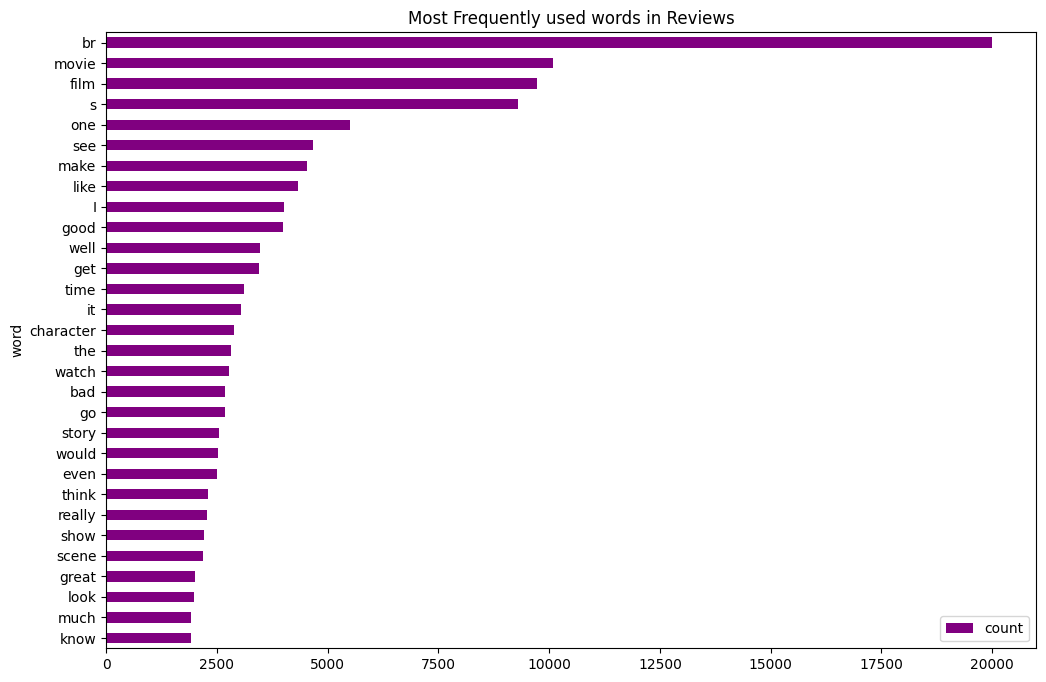

In [61]:
# Plot the most common words
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='word', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently used words in Reviews")
plt.show()

In [62]:
# Assuming `token_list` is a list of tokens
bigrams = zip(token_list, token_list[1:])
counts_bigrams = collections.Counter(bigrams)

In [63]:
# Convert the counts to DataFrame
bigram_df = pd.DataFrame(counts_bigrams.most_common(20), columns=['bigram', 'count'])

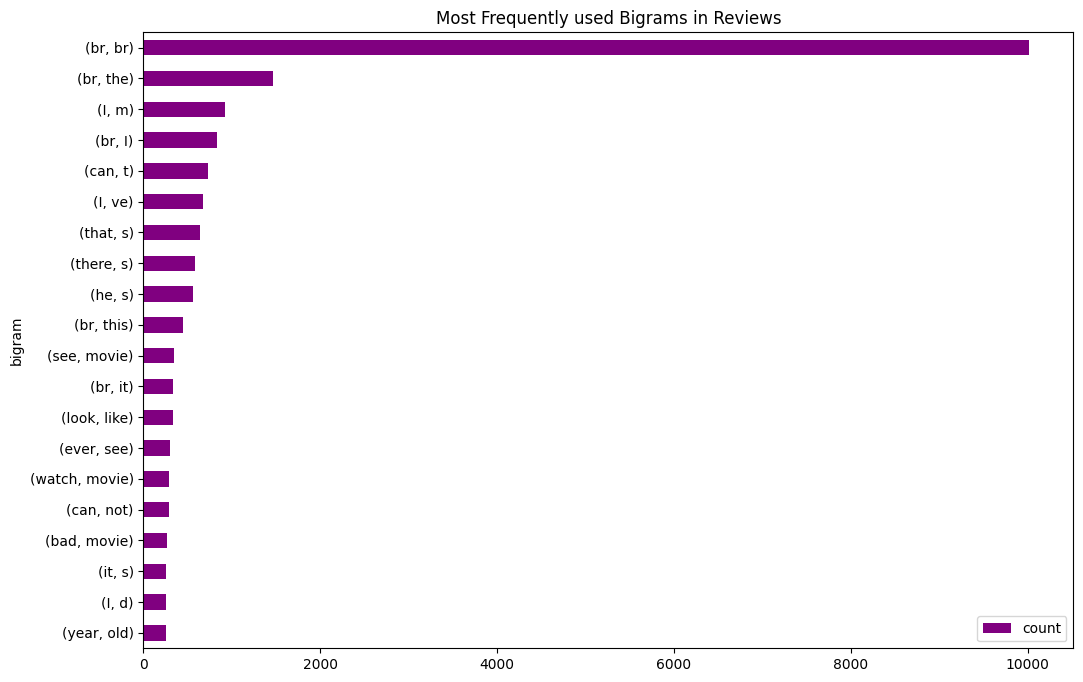

In [64]:
# Plot the bigram frequencies
fig, ax = plt.subplots(figsize=(12, 8))
bigram_df.sort_values(by='count').plot.barh(x='bigram', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently used Bigrams in Reviews")
plt.show()


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_converter = TfidfVectorizer(max_features=2000)
features = tfidf_converter.fit_transform(reviews['text']).toarray()


In [66]:
features

array([[0.        , 0.        , 0.        , ..., 0.08802674, 0.        ,
        0.        ],
       [0.        , 0.        , 0.1211467 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
reviews


,text,label,tokens,lemmatized_tokens,lemmatized_text
0,always wrote series complete stink fest jim be...,0,"[always, wrote, series, complete, stink, fest,...","[always, write, series, complete, stink, f, ji...",always write series complete stink f jim belus...
1,st watched dir steve purcell typical m...,0,"[st, watched, dir, steve, purcell, typical, ma...","[st, watch, dir, steve, purcell, typical, mary...",st watch dir steve purcell typical mary kate a...
2,movie poorly written directed fell asleep minu...,0,"[movie, poorly, written, directed, fell, aslee...","[movie, poorly, write, direct, fall, asleep, m...",movie poorly write direct fall asleep minute m...
3,interesting thing miryang secret sunshine ac...,1,"[interesting, thing, miryang, secret, sunshine...","[interesting, thing, miryang, secret, sunshine...",interesting thing miryang secret sunshine acto...
4,first read berlin meer expect much thought ...,0,"[first, read, berlin, meer, expect, much, thou...","[first, read, berlin, meer, expect, much, thin...",first read berlin meer expect much think right...
...,...,...,...,...,...
4995,kind picture john lassiter would making today ...,1,"[kind, picture, john, lassiter, would, making,...","[kind, picture, john, lassiter, would, make, t...",kind picture john lassiter would make today ad...
4996,must see saw whipped press screening hilariou...,1,"[must, see, saw, whipped, press, screening, hi...","[must, see, see, whip, press, screening, hilar...",must see see whip press screening hilarious we...
4997,nbc ashamed allow children see this definite...,0,"[nbc, ashamed, allow, children, see, this, def...","[nbc, ashame, allow, child, see, this, definit...",nbc ashame allow child see this definitely wou...
4998,movie clumsy mishmash various ghost story susp...,0,"[movie, clumsy, mishmash, various, ghost, stor...","[movie, clumsy, mishmash, various, ghost, stor...",movie clumsy mishmash various ghost story susp...


In [68]:
target = reviews['label']

In [70]:
# Light Gradient Boosting Machine
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [71]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [73]:
clf = lgb.LGBMClassifier(max_depth=20,n_estimators=25,min_child_weight=0.0016,n_jobs=-1)

In [74]:
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

print("Test data accuracy is: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1748, number of negative: 1752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.396947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80283
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 1987
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499429 -> initscore=-0.002286
[LightGBM] [Info] Start training from score -0.002286
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test data accuracy is:  0.796
              precisio

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [84]:
# Assuming 'text' is the text data you want to create a word cloud for
text = " ".join(review for review in reviews['text'])



In [82]:
# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

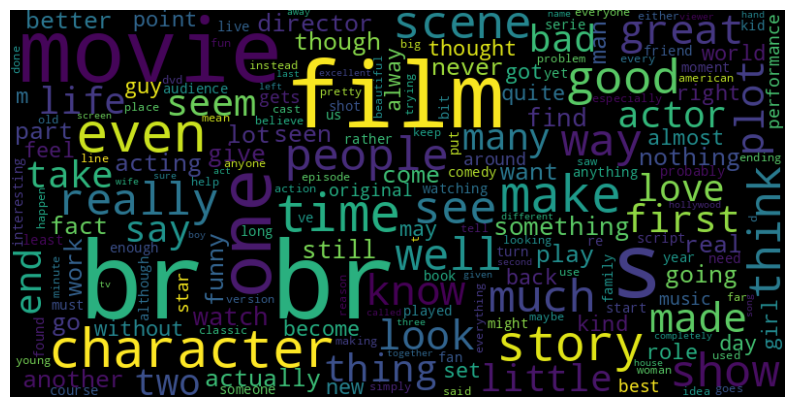

In [86]:
# Display the generated image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()